<a href="https://colab.research.google.com/github/qayyumu/GradioExp/blob/main/SESSION_02_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classes & Module 📘
Python is an object oriented programming language.<br>
Almost everything in Python is an object, with its properties and methods.<br>
A Class is like an object constructor, or a "blueprint" for creating objects.<br>

In [1]:
!pip install requests 2> /dev/null

In [2]:
import requests
from bs4 import BeautifulSoup

class BaseScraper:
    def __init__(self, url):
        self.url = url

    def fetch_page(self):
        try:
            response = requests.get(self.url)
            if response.status_code == 200:
                return response.content
            else:
                print(f"Failed to retrieve page: {response.status_code}")
                return None
        except requests.RequestException as e:
            print(f"Error fetching page: {e}")
            return None


### Inheritance

In [3]:
class HTMLScraper(BaseScraper):
    def __init__(self, url):
        super().__init__(url)

    def scrape_content(self):
        html_content = self.fetch_page()
        if html_content:
            soup = BeautifulSoup(html_content, 'html.parser')
            # Example: Scraping titles
            titles = soup.find_all('h2')
            for title in titles:
                print(title.text.strip())

# Example usage:
url = 'https://www.webscraper.io/test-sites'
html_scraper = HTMLScraper(url)
html_scraper.scrape_content()

E-commerce site
E-commerce site with pagination links
E-commerce site with AJAX pagination links
E-commerce site with "Load more" buttons
E-commerce site that loads items while scrolling
Table playground


## Files and Directories 📁

### Read and write to a file

In [4]:
def write_to_file(file_name, data):
    try:
        with open(file_name, 'w') as file:
            file.write(data)
    except Exception as e:
        print("unable to read File")
        print(e)

write_to_file('test.txt', 'Cretating a file')


In [5]:
def read_file_content(file_name):
    try:
        with open(file_name, 'r') as file:
            print(file.read())
    except Exception as e:
        print("unable to read File")
        print(e)
read_file_content('test.txt')

Cretating a file


In [6]:
def write_to_file_improved(file_name, mode, data):
    try:
        with open(file_name, mode) as file:
            file.write(data)
    except Exception as e:
        print("unable to read File")
        print(e)
write_to_file_improved('test.tx', 'a','\nadded new data')
read_file_content('test.txt')

Cretating a file
added new data


### Iterate over files in directory

In [7]:
from pathlib import Path
# p = Path('../')
p = Path()
print(p.exists())
for file in p.glob('*.tx'):
    print(file)

###################################################
# Challenge: move one directory up in path and    #
# print the content of first .py file             #
# Hint:                                           #
# '.' represent current dir and '../' Parent      #
# to find .py file use p.globe("*.py") and then   #
# print data by using one of above give functions #
###################################################

True
test.txt


## External packages 📤

### Numpy
NumPy stands for Numerical Python.<br>
NumPy is a Python library used for working with arrays.<br>
It also has functions for working in domain of linear algebra, fourier transform, and matrices.<br>

    In Python we have lists that serve the purpose of arrays,
    but they are slow to process.
    NumPy aims to provide an array object that is up to 50x faster
    than traditional Python lists.
    The array object in NumPy is called ndarray, it provides a lot
    of supporting functions that make working with ndarray very easy.
    Arrays are very frequently used in data science, where speed and
    resources are very important.


In [8]:
import numpy as np

1D and 2D Arrays

In [9]:
x = np.array(100)
x1 = [100]
y = np.array([100])
print(x,x1,y,sep='\n')
print(f"Array-y, Shape:{y.shape} Dim:{y.ndim}")
print(f"Array, x-type:{type(x)} x1-type:{type(x1)} y-type:{type(y)}")

100
[100]
[100]
Array-y, Shape:(1,) Dim:1
Array, x-type:<class 'numpy.ndarray'> x1-type:<class 'list'> y-type:<class 'numpy.ndarray'>


In [10]:
y = np.array([100,200])
y1 = np.array([[100,200],[300,400]])
print(f"Array-y,y1, Shape:{y.shape} ,{y1.shape}")
print(f"Array-y,y1, ndim:{y.ndim} ,{y1.ndim}")
print(y1[0][0])

## Matrix -- rank 3 tensors
y1 = np.array([ [   [100,200],
                    [300,400] ],
                [   [100,200],
                    [300,400]] ])
print(f"Array-y1, Shape:{y1.shape} Dim,{y1.ndim}")
# Array Slicing
print(y1[0][0][1])
print(y1[0][:][:])
print(y1[1][:][:])
print("SUM array using numpy:")
print(y1.sum())
print("get array mean using numpy:")
print(y1.mean())

Array-y,y1, Shape:(2,) ,(2, 2)
Array-y,y1, ndim:1 ,2
100
Array-y1, Shape:(2, 2, 2) Dim,3
200
[[100 200]
 [300 400]]
[[100 200]
 [300 400]]
SUM array using numpy:
2000
get array mean using numpy:
250.0


generate Time series

In [11]:
import numpy as np
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)

### Pandas
Pandas is a Python library used for working with data sets.<br>
It has functions for analyzing, cleaning, exploring, and manipulating data.<br>
The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008.<br>
Usage:<br>

     - Is there a correlation between two or more columns?
     - What is average value?
     - Max value?
     - Min value?


Import Pandas

In [12]:
import numpy as np
import pandas as pd
##object creation
s = pd.Series([1,2,3,4,np.nan,6,7])
print(s)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    6.0
6    7.0
dtype: float64


/Users/anaconda3/envs/torchEnv/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [13]:
dates = pd.date_range('20220110',periods=5)
print(dates)

DatetimeIndex(['2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
               '2022-01-14'],
              dtype='datetime64[ns]', freq='D')


In [14]:
### dataframe
df = pd.DataFrame(np.random.randn(5,5),index=dates,columns=list('ABCDE'))
print(df.info())
print(df.head())
print('pandas to numpy array', df.to_numpy())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2022-01-10 to 2022-01-14
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       5 non-null      float64
 2   C       5 non-null      float64
 3   D       5 non-null      float64
 4   E       5 non-null      float64
dtypes: float64(5)
memory usage: 240.0 bytes
None
                   A         B         C         D         E
2022-01-10 -2.242304  1.920414 -0.090006  1.224172 -0.667613
2022-01-11 -0.490078  0.228318  0.184258  0.830956 -1.886927
2022-01-12 -1.085932  1.050091 -1.056080 -1.266690 -0.521360
2022-01-13  0.417957  0.511069  0.094387 -1.176468  1.456020
2022-01-14  0.853302  2.123770  0.539041  0.654406 -2.456375
pandas to numpy array [[-2.24230398  1.92041407 -0.09000604  1.22417246 -0.66761255]
 [-0.49007849  0.22831753  0.1842582   0.83095627 -1.88692676]
 [-1.08593193  1.05009098 -1.05608029 -1.2666899

In [15]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20220110"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

print(df2.tail(2))
print(df2.columns)

     A          B    C  D      E    F
2  1.0 2022-01-10  1.0  3   test  foo
3  1.0 2022-01-10  1.0  3  train  foo
Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


### Matplot lib
Matplotlib is a low level graph plotting library in python that serves as a visualization utility.<br>
Matplotlib was created by John D. Hunter.<br>
Matplotlib is open source and we can use it freely.<br>

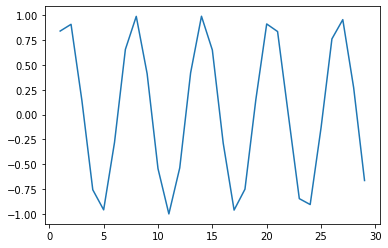

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos
xpoints = np.array(range(1,30))
ypoints = []
for i in xpoints:
    ypoints.append(sin(i))
# try using list comprehention
# ypoints = [sin(ypoint) for ypoint in xpoints]
plt.plot(xpoints, ypoints)
plt.show()

### Different types of graphs in matplotlib

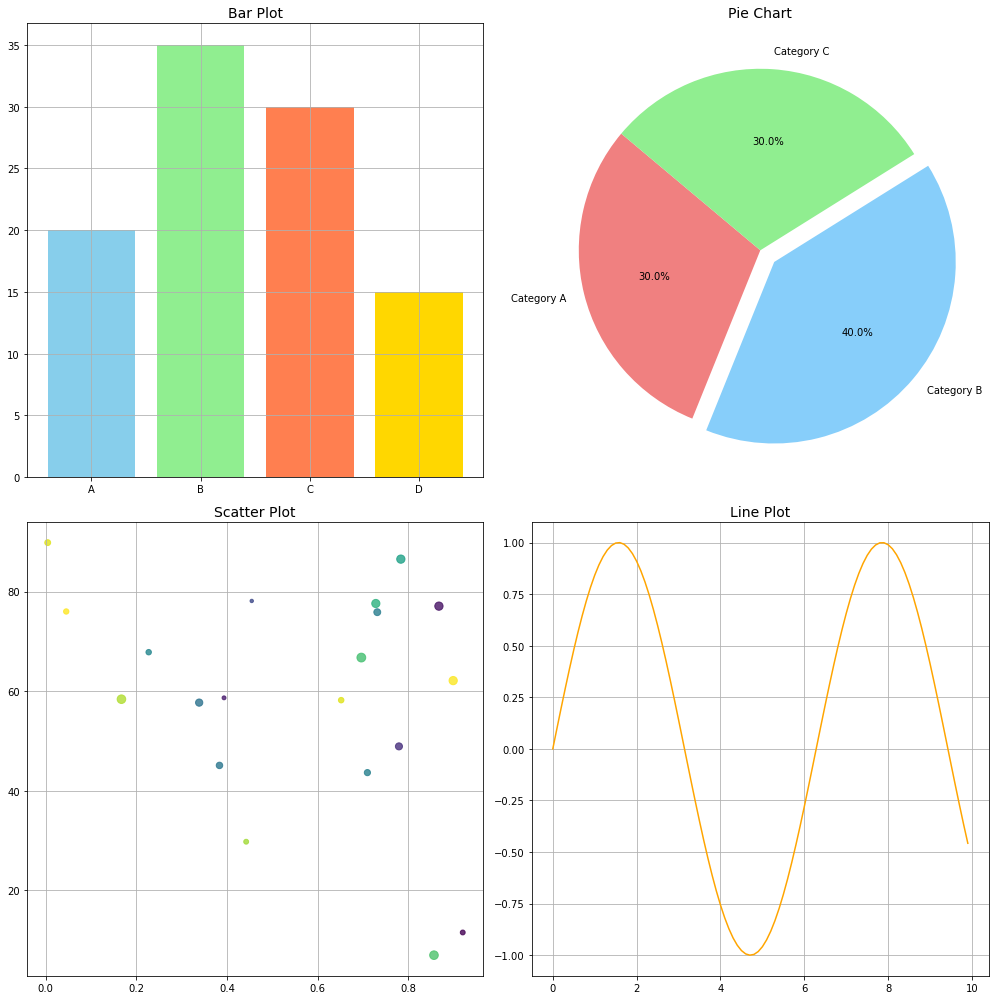

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data for different types of plots
plot_data = [
    {
        'title': 'Bar Plot',
        'data': {
            'Categories': ['A', 'B', 'C', 'D'],
            'Values': [20, 35, 30, 15]
        }
    },
    {
        'title': 'Pie Chart',
        'data': {
            'Labels': ['Category A', 'Category B', 'Category C'],
            'Sizes': [30, 40, 30],
            'Explode': (0, 0.1, 0)  # Explode second slice (Category B)
        }
    },
    {
        'title': 'Scatter Plot',
        'data': {
            'X': np.random.rand(20),
            'Y': np.random.rand(20) * 100,
            'Sizes': np.random.rand(20) * 100,
            'Colors': np.random.rand(20)
        }
    },
    {
        'title': 'Line Plot',
        'data': {
            'X': np.arange(0, 10, 0.1),
            'Y': np.sin(np.arange(0, 10, 0.1))
        }
    }
]

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Flatten axs array for easier indexing
axs = axs.flatten()

# Iterate through plot_data and plot each type of plot
for i, data in enumerate(plot_data):
    title = data['title']
    plot_data = data['data']

    if title == 'Bar Plot':
        # Bar Plot
        categories = plot_data['Categories']
        values = plot_data['Values']
        axs[i].bar(categories, values, color=['skyblue', 'lightgreen', 'coral', 'gold'])
        axs[i].set_title(title, fontsize=14)

    elif title == 'Pie Chart':
        # Pie Chart
        labels = plot_data['Labels']
        sizes = plot_data['Sizes']
        explode = plot_data['Explode']
        axs[i].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
        axs[i].set_title(title, fontsize=14)

    elif title == 'Scatter Plot':
        # Scatter Plot
        x = plot_data['X']
        y = plot_data['Y']
        sizes = plot_data['Sizes']
        colors = plot_data['Colors']
        axs[i].scatter(x, y, s=sizes, c=colors, cmap='viridis', alpha=0.8)
        axs[i].set_title(title, fontsize=14)

    elif title == 'Line Plot':
        # Line Plot
        x = plot_data['X']
        y = plot_data['Y']
        axs[i].plot(x, y, color='orange')
        axs[i].set_title(title, fontsize=14)

    axs[i].grid(True)

# Adjust layout and display the grid of plots
plt.tight_layout()
plt.show()


#### User Connectivity graph

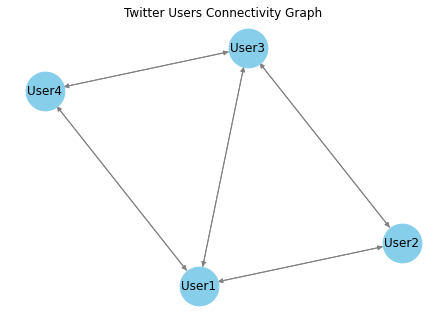

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# Sample data: Twitter users and their connections (edges)
twitter_users = {
    'User1': ['User2', 'User3', 'User4'],
    'User2': ['User1', 'User3'],
    'User3': ['User1', 'User2', 'User4'],
    'User4': ['User1', 'User3']
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each user
for user in twitter_users:
    G.add_node(user)

# Add edges between users based on connections
for user, connections in twitter_users.items():
    for connection in connections:
        G.add_edge(user, connection)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_color='black', edge_color='gray')

# Display the graph
plt.title('Twitter Users Connectivity Graph')
plt.show()


## Tips and Advance concepts 👇



### List of functions

in python we can use lists to store functions as an element and when needed call a specific function by getting it from specified index.
This kind of techique is good for functions having same signature.

*   Can be helpful to reduce unwante ifelse ledder
*   Should ony be used for code having little to no interaction wiht user's input
*    also littlebit difficult to debug.

<b> Remember index always starts at 0 (Except for some people who use matlab )



In [23]:
# class UNDEFIEDOPERATION is derived from super class Exception
# to make it easy for debuggin messy code wiht little effort.
class UNDEFIEDOPERATION(Exception):
    # Constructor or Initializer
    def __init__(self, message='Undefinde operation'):
        self.message = message

    # __str__ is to print() the value
    def __str__(self):
        return(repr(self.message))
class OPCODE:
    ADD = 0
    SUB = 1
    MUL = 2

def add(num1, num2):
    return num1 + num2
def subtract(num1, num2):
    return num1 - num2
def multiply(num1, num2):
    return num1 * num2

def calculate(num1, num2, opp_code):
    if opp_code == OPCODE.ADD:
        return add(num1, num2)
    if opp_code == OPCODE.SUB:
        return subtract(num1, num2)
    if opp_code == OPCODE.MUL:
        return multiply(num1, num2)

def calculate_simplefied(num1, num2, opp_code):
    if(opp_code >=3):
        raise UNDEFIEDOPERATION()
    function = [add, subtract, multiply]
    return function[opp_code](num1, num2)


In [24]:
calculat_res = calculate(3, 4, OPCODE.SUB)
print(f'Result = {calculat_res}')
calculate_simplefied_res =  calculate_simplefied(3, 4, OPCODE.MUL)
print(f'Result = {calculate_simplefied_res}')

Result = -1
Result = 12


In [26]:
# catch an undefined operations
calculate_simplefied(3, 4, 1)

-1

### Switch case statement in python
So by default python does not support switch case statemetns but dictionaries can be used in this regard to simulate switch statemtn.
this process can optimize list of functions as it is easily manageable

In [27]:
def calculate_simplefied_switch_case(num1, num2, operation):
    def default(num1, num2):
        raise UNDEFIEDOPERATION()
    switch ={
        'add':add,
        'sub':subtract,
        'mul':multiply
    }
    return switch.get(operation, default)(num1, num2)

In [28]:
calculate_simplefied_switch_case(1, 2, 'mul')

2